In [140]:
!echo "https://noteable.edina.ac.uk/user/$(jupyter notebook list | grep -oP '(?<=user\/).*(?=\/\?)' )/tree?token=$( jupyter notebook list | grep -oP '(?<=token=).*(?= ::)' )"

https://noteable.edina.ac.uk/user/cfzqz5lg1p9qwa7ppr9ogl/tree?token=FiwWKvAQQLuzJwRIZH8rXQ


In [141]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
import math
from scipy import stats

In [142]:
dat = pd.read_csv('https://www.inf.ed.ac.uk/teaching/courses/fds/data/project-2021-2022/spotify/data.csv.zip')
dat

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec
...,...,...,...,...,...,...,...
3441192,196,More Than You Know,Axwell /\ Ingrosso,2126,https://open.spotify.com/track/71bBFbfn2OBK5Qw...,2018-01-09,hk
3441193,197,Issues,Julia Michaels,2117,https://open.spotify.com/track/7vu0JkJh0ldukEY...,2018-01-09,hk
3441194,198,Tuo Fei Lun,Eason Chan,2112,https://open.spotify.com/track/0pmGleExiQyd0Hx...,2018-01-09,hk
3441195,199,面具,Alfred Hui,2102,https://open.spotify.com/track/58SUsgamkW6vFFq...,2018-01-09,hk


In [143]:
#Replacing the two letter country codes with the country names for better 
dat.replace('ec', 'Ecuador', inplace=True)
dat.replace('fr', 'France', inplace=True)
dat.replace('ar', 'Argentina', inplace=True)
dat.replace('fi', 'Finland', inplace=True)
dat.replace('no', 'Norway', inplace=True)
dat.replace('it', 'Italy', inplace=True)
dat.replace('lt', 'Lithuania', inplace=True)
dat.replace('ph', 'Philippines', inplace=True)
dat.replace('tw', 'Taiwan', inplace=True)
dat.replace('nz', 'New Zealand', inplace=True)
dat.replace('ee', 'Estonia', inplace=True)
dat.replace('tr', 'Turkey', inplace=True)
dat.replace('us', 'USA', inplace=True)
dat.replace('sv', 'El Salvador', inplace=True)
dat.replace('cr', 'Costa Rica', inplace=True)
dat.replace('de', 'Germany', inplace=True)
dat.replace('cl', 'Chile', inplace=True)
dat.replace('jp', 'Japan', inplace=True)
dat.replace('br', 'Brazil', inplace=True)
dat.replace('hn', 'Honduras', inplace=True)
dat.replace('gt', 'Guatemala', inplace=True)
dat.replace('ch', 'China', inplace=True)
dat.replace('hu', 'Hungary', inplace=True)
dat.replace('ca', 'Canada', inplace=True)
dat.replace('pe', 'Peru', inplace=True)
dat.replace('be', 'Belgium', inplace=True)
dat.replace('my', 'Malaysia', inplace=True)
dat.replace('dk', 'Denmark', inplace=True)
dat.replace('bo', 'Bolivia', inplace=True)
dat.replace('pl', 'Poland', inplace=True)
dat.replace('at', 'Austria', inplace=True)
dat.replace('pt', 'Portugal', inplace=True)
dat.replace('se', 'Sweden', inplace=True)
dat.replace('mx', 'Mexico', inplace=True)
dat.replace('pa', 'Panama', inplace=True)
dat.replace('uy', 'Uruguay', inplace=True)
dat.replace('is', 'Iceland', inplace=True)
dat.replace('es', 'Spain', inplace=True)
dat.replace('cz', 'Czech', inplace=True)
dat.replace('ie', 'Ireland', inplace=True)
dat.replace('nl', 'Netherlands', inplace=True)
dat.replace('sk', 'Slovakia', inplace=True)
dat.replace('co', 'Colombia', inplace=True)
dat.replace('sg', 'Singapore', inplace=True)
dat.replace('id', 'Indonesia', inplace=True)
dat.replace('do', 'Dominican Republic', inplace=True)
dat.replace('lu', 'Luxembourg', inplace=True)
dat.replace('gb', 'UK', inplace=True)
dat.replace('global', 'Global', inplace=True)
dat.replace('py', 'Paraguay', inplace=True)
dat.replace('au', 'Australia', inplace=True)
dat.replace('lv', 'Latvia', inplace=True)
dat.replace('gr', 'Greece', inplace=True)
dat.replace('hk', 'Hong Kong', inplace=True)

regions = dat['Region'].unique()

countries = ['Ecuador', 'France', 'Argentina', 'Finland', 'Norway', 'Italy', 'Lithuania',
 'Philippines', 'Taiwan', 'New Zealand', 'Estonia', 'Turkey', 'USA',
 'El Salvador', 'Costa Rica', 'Germany', 'Chile' ,'Japan' ,'Brazil', 'Honduras',
 'Guatemala', 'China' ,'Hungary' ,'Canada' ,'Peru', 'Belgium', 'Malaysia',
 'Denmark', 'Bolivia', 'Poland' ,'Austria', 'Portugal', 'Sweden', 'Mexico',
 'Panama', 'Uruguay', 'Iceland', 'Spain', 'Czech', 'Ireland', 'Netherlands',
 'Slovakia', 'Colombia' ,'Singapore', 'Indonesia' ,'Dominican Republic',
 'Luxembourg', 'UK', 'Paraguay', 'Australia', 'Latvia', 'Greece',
 'Hong Kong']

In [144]:
Africa = ('Algeria','Angola','Benin','Botswana','Burkina','Burundi','Cameroon','Cape Verde','Central African Republic','Chad','Comoros','Congo','Congo, Democratic Republic of','Djibouti','Egypt','Equatorial Guinea','Eritrea','Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea-Bissau','Ivory Coast','Kenya','Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania','Togo','Tunisia','Uganda','Zambia','Zimbabwe')
Asia = ('Afghanistan','Bahrain','Bangladesh','Bhutan','Brunei','Burma (Myanmar)','Cambodia','China','East Timor','Hong Kong','India','Indonesia','Iran','Iraq','Israel','Japan','Jordan','Kazakhstan','Korea, North','Korea, South','Kuwait','Kyrgyzstan','Laos','Lebanon','Malaysia','Maldives','Mongolia','Nepal','Oman','Pakistan','Philippines','Qatar','Russian Federation','Saudi Arabia','Singapore','Sri Lanka','Syria','Taiwan','Tajikistan','Thailand','Turkey','Turkmenistan','United Arab Emirates','Uzbekistan','Vietnam','Yemen')
Europe = ('Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia and Herzegovina','Bulgaria','Croatia','Cyprus','Czech','Denmark','Estonia','Finland','France','Georgia','Germany','Greece','Hungary','Iceland','Ireland','Italy','Latvia','Liechtenstein','Lithuania','Luxembourg','Macedonia','Malta','Moldova','Monaco','Montenegro','Netherlands','Norway','Poland','Portugal','Romania','San Marino','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Ukraine','UK','Vatican City')
North_America = ('Antigua and Barbuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago','USA')
South_America = ('Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Guyana','Paraguay','Peru','Suriname','Uruguay','Venezuela')
Australia_Oceania = ('Australia','Fiji','Kiribati','Marshall Islands','Micronesia','Nauru','New Zealand','Palau','Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu')

def getContinent(country):
    if country in Africa:
        return "Africa"
    elif country in Asia:
        return "Asia"
    elif country in Europe:
        return "Europe"
    elif country in North_America:
        return "North America"
    elif country in South_America:
        return "South America"
    elif country in Australia_Oceania:
        return "Australia/Oceania"
    else:
        return "Other"


def getLanguage(country):
    if country in ['Ecuador','Argentina','El Salvador','Costa Rica','Chile','Honduras','Guatemala','Peru','Bolivia','Mexico','Panama','Uruguay','Spain','Colombia','Dominican Republic','Paraguay']:
        return 'Spanish'
    elif country in ['New Zealand','USA','Canada','Ireland','UK','Australia', 'Singapore']:
        return 'English'
    elif country in ['France', 'Luxembourg']:
        return 'French'
    elif country in ['Finland']:
        return 'Finnish'
    elif country in ['Norway']:
        return 'Norwegian'
    elif country in ['Italy']:
        return 'Italian'
    elif country in ['Lithuania']:
        return 'Lithuanian'
    elif country in ['Philippines']:
        return 'Filipino'
    elif country in ['Taiwan', 'Hong Kong', 'China']:
        return 'Chinese Mandarin'
    elif country in ['Estonia']:
        return 'Estonian'
    elif country in ['Turkey']:
        return 'Turkish'
    elif country in ['Germany', 'Austria']:
        return 'German'
    elif country in ['Japan']:
        return 'Japanese'
    elif country in ['Brazil', 'Portugal']:
        return 'Portuguese'
    elif country in ['Hungary']:
        return 'Hungarian'
    elif country in ['Netherlands','Belgium']:
        return 'Dutch'
    elif country in ['Malaysia']:
        return 'Malay'
    elif country in ['Denmark']:
        return 'Danish'
    elif country in ['Poland']:
        return 'Polish'
    elif country in ['Sweden']:
        return 'Swedish'
    elif country in ['Iceland']:
        return 'Icelandic'
    elif country in ['Czech']:
        return 'Czech'
    elif country in ['Slovakia']:
        return 'Slovak'
    elif country in ['Indonesia']:
        return 'Javanese'
    elif country in ['Latvia']:
        return 'Latvian'
    elif country in ['Greece']:
        return 'Greek'
    
    
    

dat['Continent']=dat['Region'].apply(getContinent)
dat_other = dat[dat['Continent'] == 'Other']

In [145]:
def HPvsLifeRegion(region, plot):
    dat_filtered = dat[dat['Region'] == region]
    #if only_200:
     #   for date in (pd.date_range('2017-01-01', '2018-01-09')):
      #      if dat_filtered[dat_filtered['Date'] == date]['Position'].count() != 200:
       #         dat_filtered = dat_filtered[dat_filtered['Date'] != date]
    dat_filtered_2 = dat_filtered.groupby(['Track Name','Artist']).size().reset_index()
    track_data = pd.DataFrame()
    track_data['Track Name'] = dat_filtered_2['Track Name']
    track_data['Artist'] = dat_filtered_2['Artist']
    
    track_data_length = track_data['Track Name'].count()
    
    positions = []
    lifetimes = []
    for i in range(track_data_length):
        track = track_data.iloc[i]['Track Name']
        artist = track_data.iloc[i]['Artist']
        dat_track = dat_filtered[dat_filtered['Track Name'] == track]
        dat_track = dat_track[dat_track['Artist'] == artist]
        lifetime = dat_track['Position'].count()
        position = dat_track['Position'].min()
        positions.append(position)
        lifetimes.append(lifetime)
    
    track_data['Highest Position'] = pd.Series(positions)
    track_data['Lifetime'] = pd.Series(lifetimes)
    
    if plot:
        values = np.vstack([track_data['Highest Position'],track_data['Lifetime']])
        kernel = stats.gaussian_kde(values)(values)
        plt = sns.scatterplot(x = track_data['Highest Position'], y = track_data['Lifetime'], c=kernel, cmap="viridis")
        plt.invert_xaxis()
        plt.set(title='Highest Chart Position against Lifetime of Tracks in ' + region)
    return track_data
    

In [146]:
def HPvsStreamsRegion(region, plot):
    dat_filtered = dat[dat['Region'] == region]
    #if only_200:
     #   for date in (pd.date_range('2017-01-01', '2018-01-09')):
      #      if dat_filtered[dat_filtered['Date'] == date]['Position'].count() != 200:
       #         dat_filtered = dat_filtered[dat_filtered['Date'] != date]
    dat_filtered_2 = dat_filtered.groupby(['Track Name','Artist']).size().reset_index()
    track_data = pd.DataFrame()
    track_data['Track Name'] = dat_filtered_2['Track Name']
    track_data['Artist'] = dat_filtered_2['Artist']
    
    track_data_length = track_data['Track Name'].count()
    
    positions = []
    lifetimes = []
    streams = []
    for i in range(track_data_length):
        track = track_data.iloc[i]['Track Name']
        artist = track_data.iloc[i]['Artist']
        dat_track = dat_filtered[dat_filtered['Track Name'] == track]
        dat_track = dat_track[dat_track['Artist'] == artist]
        lifetime = dat_track['Position'].count()
        position = dat_track['Position'].min()
        stream = dat_track['Streams'].sum()/lifetime
        positions.append(position)
        lifetimes.append(lifetime)
        streams.append(stream)
    
    track_data['Highest Position'] = pd.Series(positions)
    track_data['Lifetime'] = pd.Series(lifetimes)
    track_data['Average Streams'] = pd.Series(streams)
    
    if plot:
        values = np.vstack([track_data['Highest Position'],track_data['Average Streams']])
        kernel = stats.gaussian_kde(values)(values)
        plt = sns.scatterplot(x = track_data['Highest Position'], y = track_data['Average Streams'], c=kernel, cmap="viridis")
        plt.invert_xaxis()
        plt.set(title='Highest Chart Position against Average Streams per Day ' + region)
        #sns.kdeplot(
        #x=track_data['Highest Position'],
        #y=track_data['Average Streams'],
        #levels=5,
        #fill=True,
        #alpha=0.6,
        #cut=2,
        #palette = 'rocket')
    return track_data

In [183]:
def HPvsStreamsContinent(continent, plot):
    dat_filtered = dat[dat['Continent'] == continent]
    #if only_200:
     #   for date in (pd.date_range('2017-01-01', '2018-01-09')):
      #      if dat_filtered[dat_filtered['Date'] == date]['Position'].count() != 200:
       #         dat_filtered = dat_filtered[dat_filtered['Date'] != date]
    dat_filtered_2 = dat_filtered.groupby(['Track Name','Artist']).size().reset_index()
    track_data = pd.DataFrame()
    track_data['Track Name'] = dat_filtered_2['Track Name']
    track_data['Artist'] = dat_filtered_2['Artist']
    
    track_data_length = track_data['Track Name'].count()
    
    positions = []
    lifetimes = []
    streams = []
    for i in range(track_data_length):
        track = track_data.iloc[i]['Track Name']
        artist = track_data.iloc[i]['Artist']
        dat_track = dat_filtered[dat_filtered['Track Name'] == track]
        dat_track = dat_track[dat_track['Artist'] == artist]
        lifetime = dat_track['Position'].count()
        position = dat_track['Position'].min()
        stream = dat_track['Streams'].sum()/lifetime
        positions.append(position)
        lifetimes.append(lifetime)
        streams.append(stream)
    
    track_data['Highest Position'] = pd.Series(positions)
    track_data['Lifetime'] = pd.Series(lifetimes)
    track_data['Average Streams'] = pd.Series(streams)
    
    if plot:
        values = np.vstack([track_data['Highest Position'],track_data['Average Streams']])
        kernel = stats.gaussian_kde(values)(values)
        plt = sns.scatterplot(x = track_data['Highest Position'], y = track_data['Average Streams'], c=kernel, cmap="viridis")
        plt.invert_xaxis()
        plt.set(title='Highest Chart Position against Average Streams per Day ' + continent)
        #sns.kdeplot(
        #x=track_data['Highest Position'],
        #y=track_data['Average Streams'],
        #levels=5,
        #fill=True,
        #alpha=0.6,
        #cut=2,
        #palette = 'rocket')
    return track_data

In [147]:
def linear_regression(region, log, lifetimeOrStreams):
    if lifetimeOrStreams == 'Lifetime':
        data = HPvsLifeRegion(region, False)
    else:
        data = HPvsStreamsRegion(region, False)
    values = np.vstack([data['Highest Position'],data[lifetimeOrStreams]])
    kernel = stats.gaussian_kde(values)(values)
    plt = sns.scatterplot(x = data['Highest Position'], y = data[lifetimeOrStreams] , c=kernel, cmap="viridis")
    plt.invert_xaxis()
    title = 'Linear Regression of Highest Chart Position against '
    if lifetimeOrStreams == 'Lifetime':
        title = title + 'Lifetime of Tracks in ' + region
    else:
        title = title + 'Average Streams per Day ' + region
    plt.set(title=title)
    X = data['Highest Position'].array.reshape(-1, 1)
    Y = data[lifetimeOrStreams].array.reshape(-1, 1)
    Y2 = []
    for y in Y:
        Y2.append(math.log(y[0]))

    linear_regressor = linear_model.LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y2)  # perform linear regression
    Y_pred = linear_regressor.predict(X)
    Y_pred2 = []
    for y_pred in Y_pred:
        Y_pred2.append(math.exp(y_pred))
    for i in range(len(X)):
        plt.plot(X[i], Y_pred2[i], marker="o", markersize=2, markeredgecolor="red", markerfacecolor="red")
    if log:
        plt.set_yscale("log")
        
        X = data['Highest Position']
        Y = data[lifetimeOrStreams]
        Y2 = []
        for y in Y:
            Y2.append(math.log(y))
        
            #Y2.append(1/(y))
        #X = stat_data['Highest Position']
        #y = stat_data['Lifetime']

        X2 = sm.add_constant(X)
        est = sm.OLS(Y2, X2)
        est2 = est.fit()
        print(est2.summary())

    

In [148]:
def get_linear_regression_line(country,lifetimeOrStreams):
    if lifetimeOrStreams == 'Lifetime':
        data = HPvsLifeRegion(country, False)
    elif lifetimeOrStreams == 'Average Streams':
        data = HPvsStreamsRegion(country, False)
    
    X = data['Highest Position'].array.reshape(-1, 1)
    Y = data[lifetimeOrStreams].array.reshape(-1, 1)
    Y2 = []
    for y in Y:
        Y2.append(math.log(y[0]))

    linear_regressor = linear_model.LinearRegression()  # create object for the class
    #linear_regressor.fit(X, Y2)  # perform linear regression
    something = linear_regressor.fit(X, Y2)
    Y_pred = linear_regressor.predict(X)
    Y_pred2 = []
    for y_pred in Y_pred:
        Y_pred2.append(math.exp(y_pred))
    X2 = []
    for x in X:
        X2.append(x[0])
        
    return [X2, Y_pred2]

,Track Name,Artist,Highest Position,Lifetime,Average Streams
0,#HEY!,Pase Libre,91,82,1329.695122
1,#Natural,Paty Cantú,28,313,7636.683706
2,...Baby One More Time - Recorded at Spotify St...,Ed Sheeran,146,3,23448.666667
3,...Ready For It?,Taylor Swift,8,196,33511.811224
4,"0 Sentimientos (Remix) [feat. Noriel, Darkiel,...",Jon Z,87,876,5655.868721
...,...,...,...,...,...
2728,Ábrete,El Gran Martín Elías,53,17,5836.235294
2729,Ángel o Demonio,Fredy Montoya,128,9,4924.444444
2730,Échame La Culpa,Luis Fonsi,1,486,85531.722222
2731,Ésta Es Mi Tierra,"Arturo ""Zambo"" Cavero",179,2,5604.500000


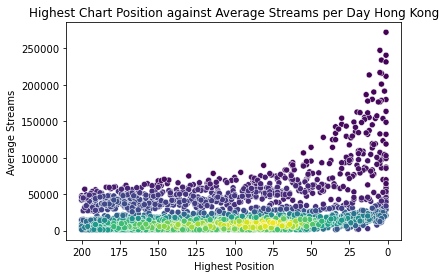

In [185]:
HPvsStreamsContinent('South America', True)

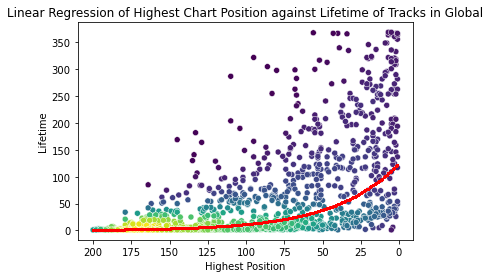

In [149]:
linear_regression('Global', False, 'Lifetime')

In [150]:
def compare_countries(country_list, log, lifetimeOrStreams):
    lines = []
    for country in country_list:
        lines.append(get_linear_regression_line(country, lifetimeOrStreams))
    plt = sns.scatterplot(x = [], y = [])
    i = 0
    for line in lines:
        plt.scatter(line[0],line[1],2, label = country_list[i])
        i += 1

    plt.invert_xaxis()
    if log:
        plt.set_yscale("log")
        
    plt.legend()
    plt.set(title='Comparison of Country Linear Regression Lines')
    plt.set_xlabel('Highest Position')
    plt.set_ylabel(lifetimeOrStreams)

In [199]:
def get_linear_regression_line_continent(continent):
    data = HPvsStreamsContinent(continent, False)
    
    X = data['Highest Position'].array.reshape(-1, 1)
    Y = data['Average Streams'].array.reshape(-1, 1)
    Y2 = []
    for y in Y:
        Y2.append(math.log(y[0]))

    linear_regressor = linear_model.LinearRegression()  # create object for the class
    #linear_regressor.fit(X, Y2)  # perform linear regression
    something = linear_regressor.fit(X, Y2)
    Y_pred = linear_regressor.predict(X)
    Y_pred2 = []
    for y_pred in Y_pred:
        Y_pred2.append(math.exp(y_pred))
    X2 = []
    for x in X:
        X2.append(x[0])
        
    return [X2, Y_pred2]

def compare_continents(log):
    continent_list = ['Asia', 'South America', 'North America', 'Europe', 'Australia/Oceania']
    lines = []
    for continent in continent_list:
        lines.append(get_linear_regression_line_continent(continent))
    plt = sns.scatterplot(x = [], y = [])
    i = 0
    for line in lines:
        plt.scatter(line[0],line[1],2, label = continent_list[i])
        i += 1

    plt.invert_xaxis()
    if log:
        plt.set_yscale("log")
        
    plt.legend()
    plt.set(title='Comparison of Continent Linear Regression Lines')
    plt.set_xlabel('Highest Position')
    plt.set_ylabel('Average Streams')

KeyboardInterrupt: 

In [151]:
country_popularity = pd.DataFrame()
country_popularity['Country'] = countries
def get_number_of_streams(country):
    return dat[dat['Region'] == country]['Streams'].sum()
country_popularity['Total Streams'] = country_popularity['Country'].apply(get_number_of_streams)
country_popularity.sort_values(by = ['Total Streams'], ascending = False, inplace = True)


In [152]:
country_popularity['Country'][:10]
most_popular_countries = ['USA', 'UK', 'Brazil', 'Mexico', 'Germany', 'Spain', 'Netherlands', 'Australia', 'Sweden', 'Philippines']

In [153]:
country_popularity.sort_values(by = ['Total Streams'], ascending = True, inplace = True)
least_popular_countries = ['Luxembourg', 'Estonia', 'Lithuania', 'Latvia', 'Slovakia', 'Greece', 'Iceland', 'El Salvador', 'Honduras', 'Bolivia']

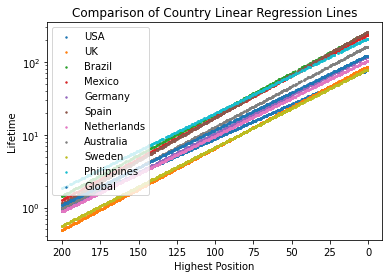

In [154]:
most_popular_countries.append('Global')
compare_countries(most_popular_countries, True, 'Lifetime')

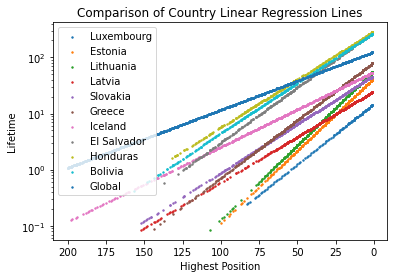

In [155]:
least_popular_countries.append('Global')
compare_countries(least_popular_countries, True, 'Lifetime')

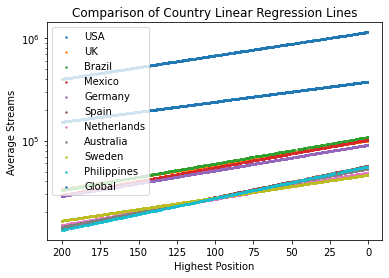

In [156]:
compare_countries(most_popular_countries, True, 'Average Streams')

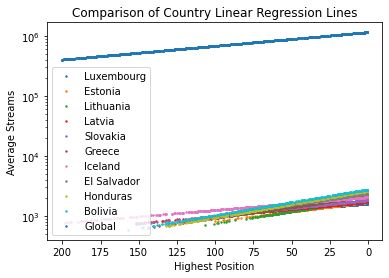

In [157]:
compare_countries(least_popular_countries, True, 'Average Streams')

In [158]:
track_data = HPvsLifeRegion('Global', False)
track_data

,Track Name,Artist,Highest Position,Lifetime
0,'Till I Collapse,Eminem,134,141
1,(Don't Fear) The Reaper,Blue Öyster Cult,146,1
2,...Baby One More Time - Recorded at Spotify St...,Ed Sheeran,97,1
3,...Ready For It?,Taylor Swift,3,124
4,1-800-273-8255,Logic,3,254
...,...,...,...,...
1335,pick up the phone,Young Thug,118,80
1336,rockstar,Post Malone,1,117
1337,wokeuplikethis*,Playboi Carti,133,100
1338,Échame La Culpa,Luis Fonsi,6,54


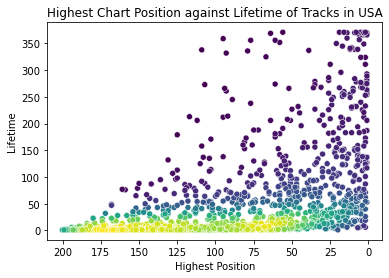

In [159]:
usa_track_data = HPvsLifeRegion('USA', True)

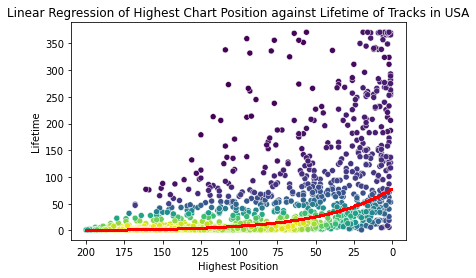

In [160]:
linear_regression('USA', False, 'Lifetime')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     1566.
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          5.10e-242
Time:                        22:29:09   Log-Likelihood:                -2826.8
No. Observations:                1667   AIC:                             5658.
Df Residuals:                    1665   BIC:                             5669.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.3685      0.061  

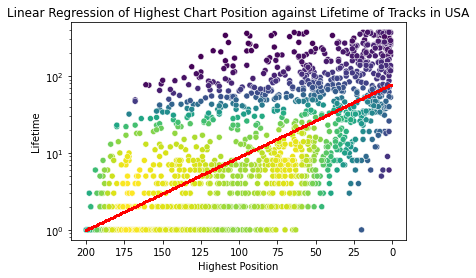

In [161]:
linear_regression('USA', True, 'Lifetime')

,Track Name,Artist,Highest Position,Lifetime,Average Streams
0,'Till I Collapse,Eminem,134,141,4.654731e+05
1,(Don't Fear) The Reaper,Blue Öyster Cult,146,1,6.139880e+05
2,...Baby One More Time - Recorded at Spotify St...,Ed Sheeran,97,1,7.920050e+05
3,...Ready For It?,Taylor Swift,3,124,1.038447e+06
4,1-800-273-8255,Logic,3,254,1.875842e+06
...,...,...,...,...,...
1335,pick up the phone,Young Thug,118,80,4.792468e+05
1336,rockstar,Post Malone,1,117,5.397599e+06
1337,wokeuplikethis*,Playboi Carti,133,100,4.852715e+05
1338,Échame La Culpa,Luis Fonsi,6,54,2.464741e+06


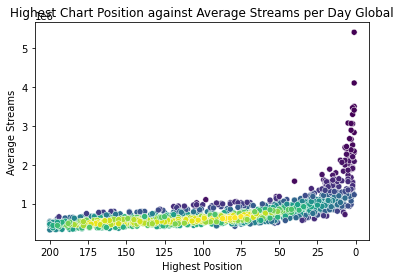

In [162]:
HPvsStreamsRegion('Global', True)

,Track Name,Artist,Highest Position,Lifetime,Average Streams
0,(Not) The One,Bebe Rexha,70,34,10150.382353
1,...Baby One More Time - Recorded at Spotify St...,Ed Sheeran,113,1,9056.000000
2,...Ready For It?,Taylor Swift,6,115,18790.817391
3,1 Night,Mura Masa,144,1,6609.000000
4,1-800-273-8255,Logic,22,241,23908.360996
...,...,...,...,...,...
1110,전야 前夜 The Eve,EXO,44,72,10260.083333
1111,지나갈 테니 Been Through,EXO,75,5,13249.000000
1112,쩔어 DOPE,BTS,134,27,5885.259259
1113,피 땀 눈물,BTS,184,3,6931.333333


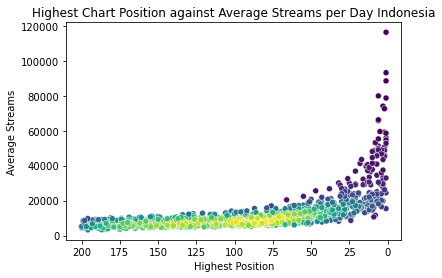

In [163]:
HPvsStreamsRegion('Indonesia', True)

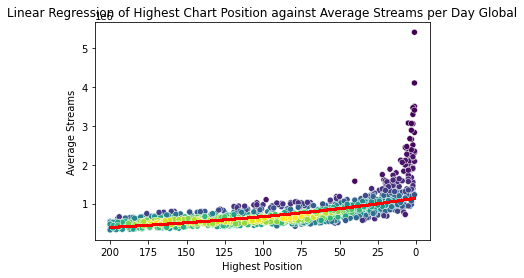

In [164]:
linear_regression('Global', False, 'Average Streams')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     2080.
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          9.64e-275
Time:                        22:29:45   Log-Likelihood:                -36.573
No. Observations:                1340   AIC:                             77.15
Df Residuals:                    1338   BIC:                             87.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               13.9591      0.013  

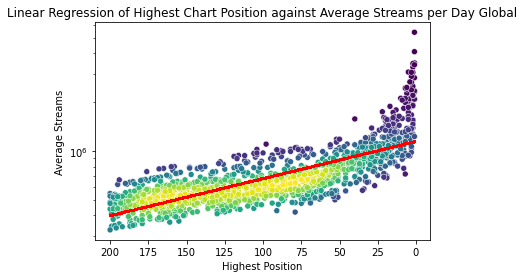

In [165]:
linear_regression('Global', True, 'Average Streams')

In [166]:
all_dates = pd.date_range('2017-01-01', '2018-01-09')
dates = dat['Date'].unique()

missing_dates = []
for date in all_dates:
    if date not in dates:
        missing_dates.append(date)
    

print(missing_dates)

#Dates Missing: May 30, May 31, June 2 (All 2017)

[Timestamp('2017-01-01 00:00:00', freq='D'), Timestamp('2017-01-02 00:00:00', freq='D'), Timestamp('2017-01-03 00:00:00', freq='D'), Timestamp('2017-01-04 00:00:00', freq='D'), Timestamp('2017-01-05 00:00:00', freq='D'), Timestamp('2017-01-06 00:00:00', freq='D'), Timestamp('2017-01-07 00:00:00', freq='D'), Timestamp('2017-01-08 00:00:00', freq='D'), Timestamp('2017-01-09 00:00:00', freq='D'), Timestamp('2017-01-10 00:00:00', freq='D'), Timestamp('2017-01-11 00:00:00', freq='D'), Timestamp('2017-01-12 00:00:00', freq='D'), Timestamp('2017-01-13 00:00:00', freq='D'), Timestamp('2017-01-14 00:00:00', freq='D'), Timestamp('2017-01-15 00:00:00', freq='D'), Timestamp('2017-01-16 00:00:00', freq='D'), Timestamp('2017-01-17 00:00:00', freq='D'), Timestamp('2017-01-18 00:00:00', freq='D'), Timestamp('2017-01-19 00:00:00', freq='D'), Timestamp('2017-01-20 00:00:00', freq='D'), Timestamp('2017-01-21 00:00:00', freq='D'), Timestamp('2017-01-22 00:00:00', freq='D'), Timestamp('2017-01-23 00:00:00'

Text(0, 0.5, 'Number of Entries')

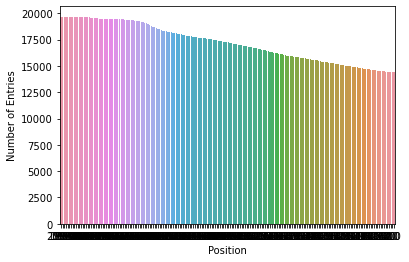

In [167]:
num = []
for i in range(1,201):
    dat_pos = dat[dat['Position'] == i]
    num.append(dat_pos['Position'].count())
plt = sns.barplot(x = np.linspace(200, 1, 200), y = num)
plt.invert_xaxis()
plt.set_xlabel('Position')
plt.set_ylabel('Number of Entries')

In [168]:
def topArtistsRegion(region):
    dat_region = dat[dat['Region'] == region]
    artists = dat_region['Artist'].unique()
    artist_data = pd.DataFrame()
    artist_data['Artist'] = artists
    #artist_data.set_index(['Artist'], inplace = True)
    artist_streams = []
    for artist in artists:
        artist_streams.append(dat_region[dat_region['Artist'] == artist]['Streams'].sum())
        
    artist_data['Streams'] = pd.Series(artist_streams)
    artist_data.sort_values(by=['Streams'], ascending = False, inplace = True)
    artist_data.reset_index(drop = True, inplace = True)
    artist_data.index += 1 
    return artist_data


In [169]:
def artistsVsRegions():
    dat_art_vs_reg = pd.DataFrame()
    dat_art_vs_reg['Artist'] = dat['Artist'].unique()
    dat_art_vs_reg.set_index(['Artist'], inplace = True)
    for region in countries:
        dat_art_vs_reg[region] = 0
    for region in countries:
        topArtists = topArtistsRegion(region)
        number_of_artists = topArtists['Artist'].count()
        for i in range(number_of_artists):
            artist = topArtists.iloc[i]['Artist']
            number_of_streams = topArtists.iloc[i]['Streams']
            dat_art_vs_reg[region].loc[artist] = number_of_streams
    
    
    return dat_art_vs_reg.drop([np.nan])
    
    
    

def getArtistPositionRegion(artist, region):
    ranking = topArtistsRegion(region)
    return ranking.index[ranking['Artist'] == artist][0]

In [170]:
artistsVsRegions = artistsVsRegions()

In [171]:
top_country = artistsVsRegions.idxmax(axis = 1)

In [172]:
artistsVsRegions_copy = artistsVsRegions.copy()

artists = artistsVsRegions_copy.index
print(len(artists))

artist_streams_log = []
for artist in artists:
    artist_streams_log.append(math.log(artistsVsRegions.loc[artist].sum()))

6628


In [173]:
def principalComponents(df):
    x = df.loc[:].values
    x = StandardScaler().fit_transform(x)
    index = df.index
    feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

    normalised_artists_vs_regions = pd.DataFrame(x,columns=feat_cols)

    pca_artists_vs_regions = PCA(n_components=2)
    principalComponents_artists_vs_regions = pca_artists_vs_regions.fit_transform(x)
    principalComponents_artists_vs_regions 

    principal_artists_vs_regions_Df = pd.DataFrame(data = principalComponents_artists_vs_regions
                 , columns = ['principal component 1', 'principal component 2'])
    principal_artists_vs_regions_Df.set_index(pd.Series(artists), inplace = True)
    principal_artists_vs_regions_Df['Language of Most Streamed Country'] = top_country.apply(getLanguage)
    principal_artists_vs_regions_Df['Log of Total Streams'] = artist_streams_log
    return principal_artists_vs_regions_Df

In [174]:
def reduceLanguages(language):
    if language not in ['English', 'Spanish', 'Chinese Mandarin']:
        return 'Other'
    else:
        return language

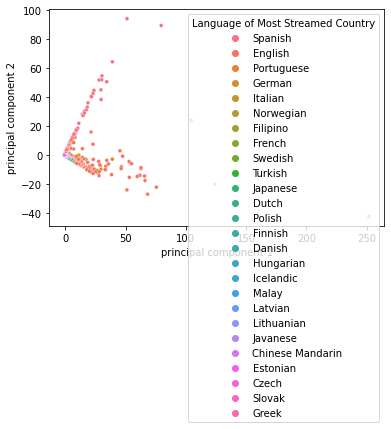

In [175]:
pc = principalComponents(artistsVsRegions_copy)
plt = sns.scatterplot(x = pc['principal component 1'], y = pc['principal component 2'], hue = pc['Language of Most Streamed Country'], s = 15)

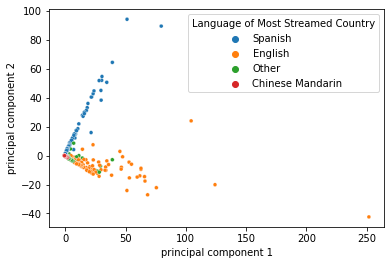

In [176]:
pc = principalComponents(artistsVsRegions_copy)
pc['Language of Most Streamed Country'] = pc['Language of Most Streamed Country'].apply(reduceLanguages)
plt = sns.scatterplot(x = pc['principal component 1'], y = pc['principal component 2'], hue = pc['Language of Most Streamed Country'], s = 15)

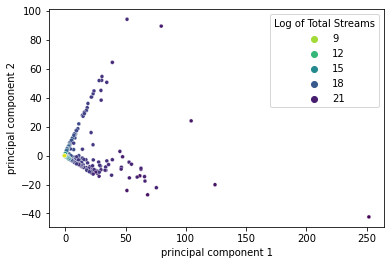

In [177]:
pc = principalComponents(artistsVsRegions_copy)
pc['Language of Most Streamed Country'] = pc['Language of Most Streamed Country'].apply(reduceLanguages)
plt = sns.scatterplot(x = pc['principal component 1'], y = pc['principal component 2'], hue = pc['Log of Total Streams'], s = 15, palette = 'viridis_r')

In [178]:
artistsVsRegions_proportion = artistsVsRegions_copy.astype(float)

for artist in artists:
    artist_streams_global = artistsVsRegions_proportion.loc[artist].sum()
    for region in countries:
        result = float(artistsVsRegions_proportion.loc[artist][region]) / artist_streams_global
        artistsVsRegions_proportion.loc[artist][region] = result
        
artistsVsRegions_proportion


        

,Ecuador,France,Argentina,Finland,Norway,Italy,Lithuania,Philippines,Taiwan,New Zealand,...,Singapore,Indonesia,Dominican Republic,Luxembourg,UK,Paraguay,Australia,Latvia,Greece,Hong Kong
Artist,,,,,,,,,,,,,,,,,,,,,
CNCO,0.017898,0.000000,0.150075,0.003299,0.001950,0.018295,0.000119,0.002763,0.000164,0.001770,...,0.001667,0.000109,0.004268,0.000000,0.048930,0.007813,0.005445,0.000040,0.000337,0.000411
Shakira,0.012073,0.025326,0.110566,0.001657,0.002953,0.023004,0.000114,0.001642,0.000527,0.000366,...,0.001071,0.000934,0.004612,0.000002,0.006181,0.005192,0.001620,0.000043,0.000346,0.000267
Zion & Lennox,0.017549,0.000000,0.138569,0.000000,0.000000,0.006058,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.007578,0.000000,0.000000,0.010635,0.000000,0.000000,0.000000,0.000000
Ricky Martin,0.015664,0.000000,0.158766,0.000000,0.000000,0.013617,0.000000,0.000000,0.000041,0.000000,...,0.000000,0.000000,0.005678,0.000000,0.000289,0.006029,0.000000,0.000000,0.000000,0.000000
J Balvin,0.010766,0.012121,0.097376,0.003827,0.006491,0.019325,0.000193,0.004043,0.001119,0.002921,...,0.002241,0.002286,0.005151,0.000051,0.030062,0.005952,0.014341,0.000197,0.000576,0.000727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
專家Dickson,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
At17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
E-Kids,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


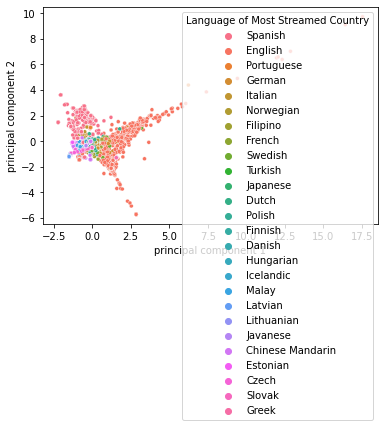

In [179]:
pc = principalComponents(artistsVsRegions_proportion)
plt = sns.scatterplot(x = pc['principal component 1'], y = pc['principal component 2'], hue = pc['Language of Most Streamed Country'], s = 15)


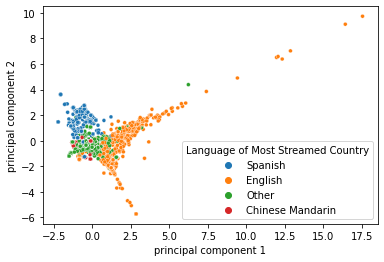

In [180]:
pc['Language of Most Streamed Country'] = pc['Language of Most Streamed Country'].apply(reduceLanguages)
plt = sns.scatterplot(x = pc['principal component 1'], y = pc['principal component 2'], hue = pc['Language of Most Streamed Country'], s =15)


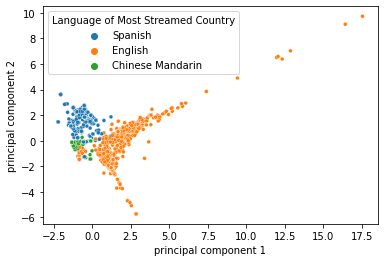

In [181]:
pc_test = pc[pc['Language of Most Streamed Country'] != 'Other']
plt = sns.scatterplot(x = pc_test['principal component 1'], y = pc_test['principal component 2'], hue = pc_test['Language of Most Streamed Country'], s =15)


In [182]:
plt = sns.scatterplot(x = pc['principal component 1'], y = pc['principal component 2'], hue = pc['Total Streams'], s =15, palette = 'viridis')


KeyError: 'Total Streams'

In [ ]:
test = pd.DataFrame()
test['Language of Most Streamed Country'] = artistsVsRegions2['Most Popular Country'].apply(getLanguage)
languages = test['Language of Most Streamed Country'].unique()
def get_number_of_instances_of_top_language(language):
    return test[test['Language of Most Streamed Country'] == language]['Language of Most Streamed Country'].count()
number_of_top_streamed_languages = pd.DataFrame()
number_of_top_streamed_languages['Language'] = pd.Series(languages)
number_of_top_streamed_languages['Number of Artists'] = number_of_top_streamed_languages['Language'].apply(get_number_of_instances_of_top_language)
number_of_top_streamed_languages.sort_values(by = ['Number of Artists'], ascending = False, inplace = True)
number_of_top_streamed_languages.set_index(['Language'])


In [ ]:
compare_continents(True)